<a href="https://colab.research.google.com/github/AlvaroViamont/Prcatica1git/blob/master/Pokem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Manipulando datos de Pokemon**
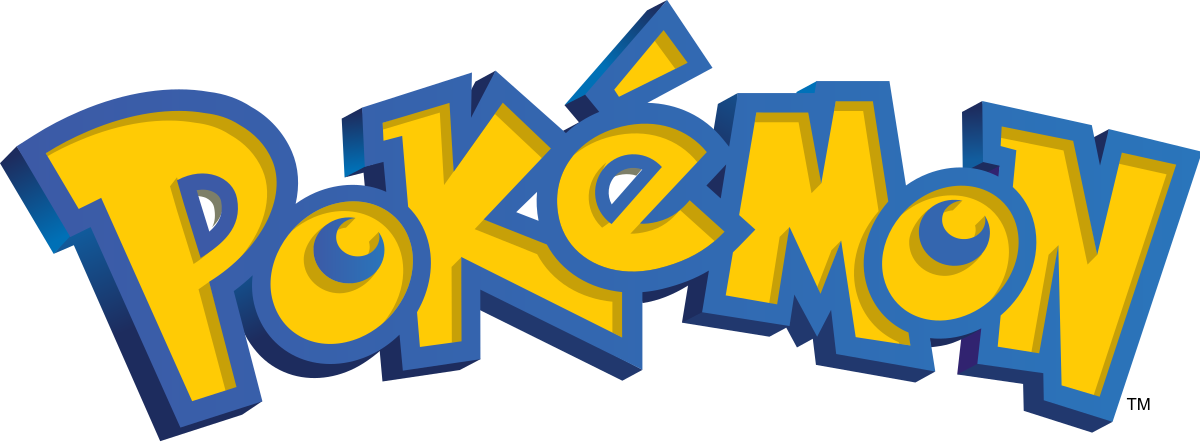

# Librerias



**Numpy** es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.

**Pandas** es un paquete de Python que proporciona estructuras de datos similares a los dataframes de R. Pandas depende de Numpy, la librería que añade un potente tipo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:

*   Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas
*   Series temporales.

Pandas proporciona herramientas que permiten:

*   leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5
*   seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas
*   fusionar y unir datos
*   transformar datos aplicando funciones tanto en global como por ventanas
manipulación de series temporales
*   hacer gráficas

**matplotlib** es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de MATLAB.

**Seaborn** es una librería para Python que permite generar fácilmente elegantes gráficos. Seaborn esta basada en matplotlib y proporciona una interfaz de alto nivel que es realmente sencilla de aprender. 

**Plotly** es la biblioteca de gráficos Python que crea gráficos interactivos con calidad de publicación. Ejemplos de cómo hacer line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts..


In [154]:
# Análisis y disputa de datos
import numpy as np
import pandas as pd
from random import randrange, choice

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Cargando datos

In [4]:
pokedex = pd.read_csv("/content/drive/MyDrive/Creando datos con pokemon/pokedex_(Update_04.21).csv", sep=',')
pokedex = pokedex.drop(['Unnamed: 0'], axis=1)

In [5]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   german_name       1045 non-null   object 
 3   japanese_name     1045 non-null   object 
 4   generation        1045 non-null   int64  
 5   status            1045 non-null   object 
 6   species           1045 non-null   object 
 7   type_number       1045 non-null   int64  
 8   type_1            1045 non-null   object 
 9   type_2            553 non-null    object 
 10  height_m          1045 non-null   float64
 11  weight_kg         1044 non-null   float64
 12  abilities_number  1045 non-null   int64  
 13  ability_1         1042 non-null   object 
 14  ability_2         516 non-null    object 
 15  ability_hidden    813 non-null    object 
 16  total_points      1045 non-null   int64  


In [6]:
pokedex.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1027.000000,930.000000,925.000000,1045.000000,872.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,440.769378,4.098565,1.529187,1.374067,71.216571,2.268900,439.353110,70.067943,80.476555,74.670813,73.031579,72.298565,68.807656,92.739046,64.064516,153.716757,1.269856,54.873853,31.489464,0.868660,1.126316,1.050718,1.035646,1.001196,1.675598,1.075120,0.953110,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,262.517231,2.272788,0.499386,3.353349,132.259911,0.803154,121.992897,26.671411,32.432728,31.259462,32.745857,28.098943,30.210094,75.878404,21.452532,79.283970,0.450522,20.398192,30.511128,0.286863,0.714569,0.609383,0.643535,0.744350,7.685308,0.753649,0.541238,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,212.000000,2.000000,1.000000,0.600000,9.000000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,436.000000,4.000000,2.000000,1.000000,29.500000,2.000000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,670.000000,6.000000,2.000000,1.600000,70.500000,3.000000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.000000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,898.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,125.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [7]:
pokedex.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


# Analisis Preliminar

In [8]:
null_filter = pokedex.isna().sum()
missing_values = null_filter.loc[pokedex.isna().sum() != 0].to_frame().copy()
missing_values

,0
type_2,492
weight_kg,1
ability_1,3
ability_2,529
ability_hidden,232
catch_rate,18
base_friendship,115
base_experience,120
growth_rate,1
egg_type_1,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

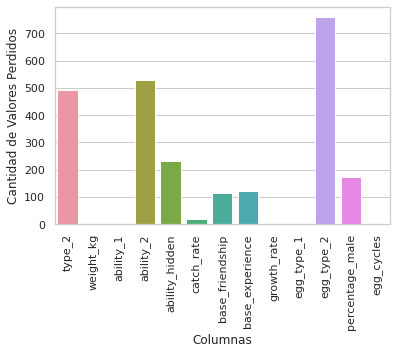

In [9]:
missing_values.columns = ['count']
missing_values['Name'] = missing_values.index
missing_values.reset_index(drop=True, inplace=True)
missing_values

sns.barplot(x='Name', y='count', data=missing_values)
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Perdidos")
plt.xticks(rotation=90)

# Analizando los datos de Pokedex

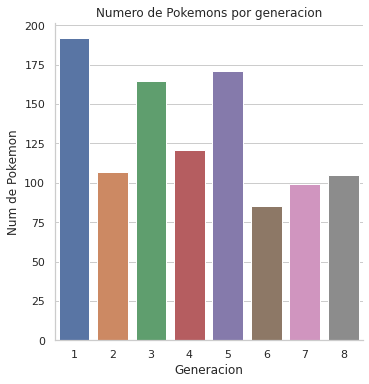

In [10]:
# Pokemons por generacion
ax = sns.catplot(x="generation", kind="count", data=pokedex)
ax.set(xlabel='Generacion', ylabel='Num de Pokemon', title='Numero de Pokemons por generacion')

In [13]:
firstgen = pokedex[pokedex['generation'] == 1].name
pd.options.display.max_rows = 50 #None
firstgen

0          Bulbasaur
1            Ivysaur
2           Venusaur
3      Mega Venusaur
4         Charmander
           ...      
192        Dragonite
193           Mewtwo
194    Mega Mewtwo X
195    Mega Mewtwo Y
196              Mew
Name: name, Length: 192, dtype: object

In [14]:
pokedex.groupby('generation')['name'].count()

generation
1    192
2    107
3    165
4    121
5    171
6     85
7     99
8    105
Name: name, dtype: int64

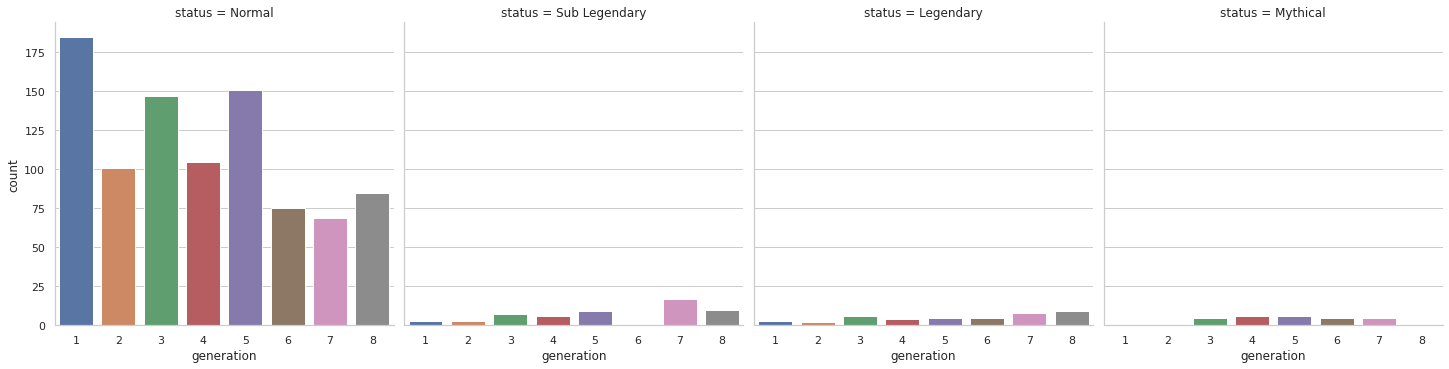

In [15]:
# Conteo de Pokemons por Estatus
sns.catplot(x="generation", col="status", kind="count", data=pokedex)

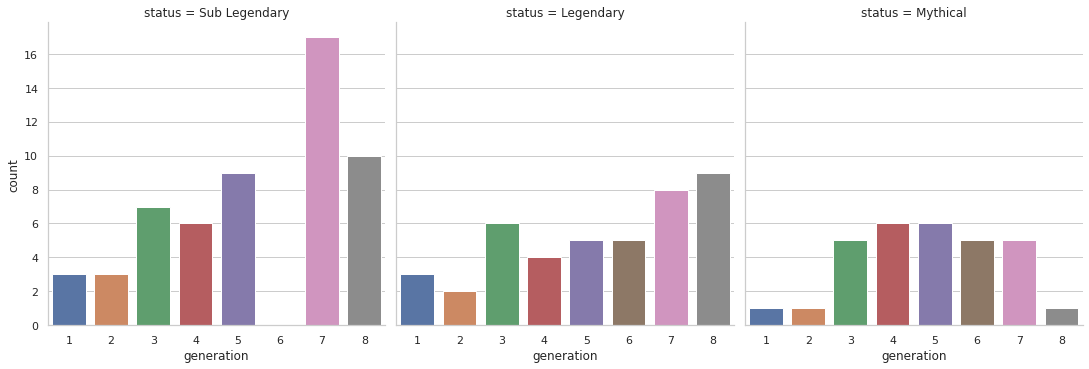

In [16]:
poke_filter = pokedex.loc[pokedex.status != "Normal"]
sns.catplot(x="generation", col="status", kind="count", data=poke_filter);

In [17]:
pokedex.groupby(['generation', 'status'])['name'].count()

generation  status       
1           Legendary          3
            Mythical           1
            Normal           185
            Sub Legendary      3
2           Legendary          2
            Mythical           1
            Normal           101
            Sub Legendary      3
3           Legendary          6
            Mythical           5
            Normal           147
            Sub Legendary      7
4           Legendary          4
            Mythical           6
            Normal           105
            Sub Legendary      6
5           Legendary          5
            Mythical           6
            Normal           151
            Sub Legendary      9
6           Legendary          5
            Mythical           5
            Normal            75
7           Legendary          8
            Mythical           5
            Normal            69
            Sub Legendary     17
8           Legendary          9
            Mythical           1
            Norma

In [18]:
# Especies de Pokemons
pokedex.species.value_counts()

Mouse Pokémon           12
Dragon Pokémon           9
Fox Pokémon              9
Pumpkin Pokémon          8
Flame Pokémon            7
                        ..
Secret Agent Pokémon     1
Lion Cub Pokémon         1
Plate Pokémon            1
Soloist Pokémon          1
Megapede Pokémon         1
Name: species, Length: 652, dtype: int64

In [19]:
pokedex.groupby('generation').species.describe()

,count,unique,top,freq
generation,,,,
1,192,97,Mouse Pokémon,12
2,107,79,Big Jaw Pokémon,3
3,165,121,Eon Pokémon,4
4,121,95,Plasma Pokémon,6
5,171,136,Zen Charm Pokémon,4
6,85,57,Pumpkin Pokémon,8
7,99,72,Dancing Pokémon,4
8,105,79,Warrior Pokémon,4


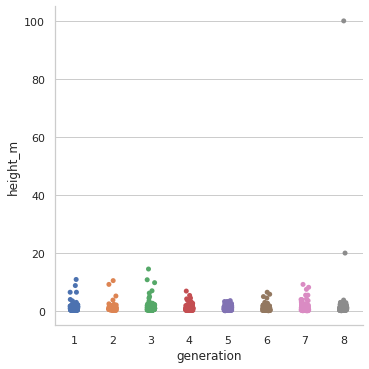

In [20]:
sns.catplot(x='generation', y='height_m', data=pokedex);

Podemos ver 2 valores atípicos en la octava generación. Trazaremos nuevamente el gráfico sin los valores atípicos.

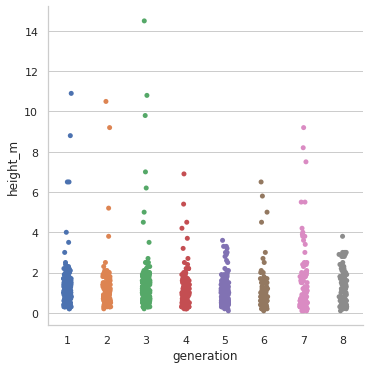

In [21]:
pok_height_out = pokedex[pokedex.height_m < 20]
sns.catplot(x='generation', y='height_m', data=pok_height_out)

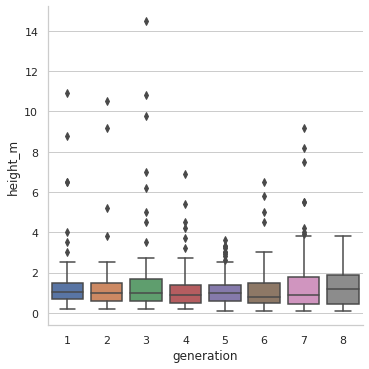

In [22]:
sns.catplot(x='generation', y='height_m', kind='box', data=pok_height_out)

In [23]:
pokedex.height_m.mean()

1.374066985645932

Podemos ver que la mayoría de Pokémon no superan los 3 o 4 metros, con una media sólida en torno a los 1,4 m.

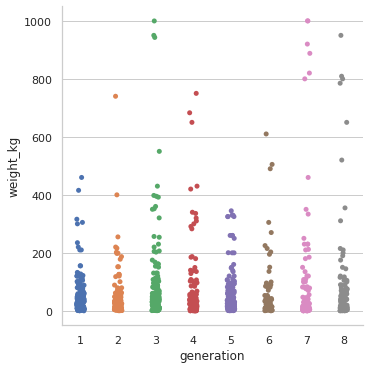

In [24]:
sns.catplot(x='generation', y='weight_kg', data=pokedex)

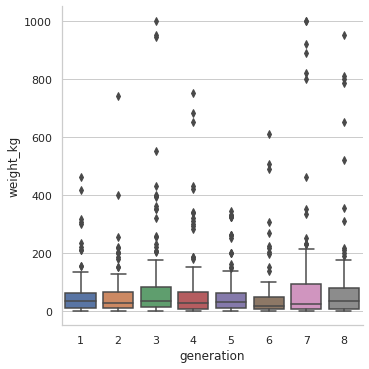

In [25]:
sns.catplot(x='generation', y='weight_kg', kind='box', data=pokedex)

In [26]:
pokedex.weight_kg.mean()

71.21657088122608

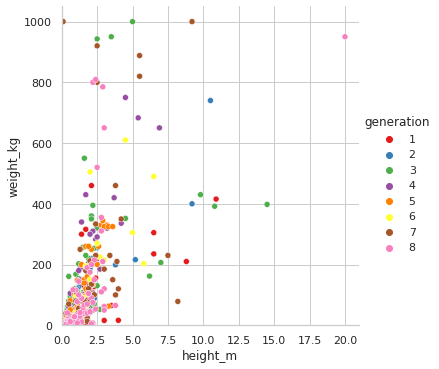

In [27]:
ax = sns.relplot(x='height_m', y='weight_kg', hue='generation', legend='full',palette='Set1', data=pokedex)
ax.set(xlim=(0, None), ylim=(0, None))

# Analizando las estadísticas base

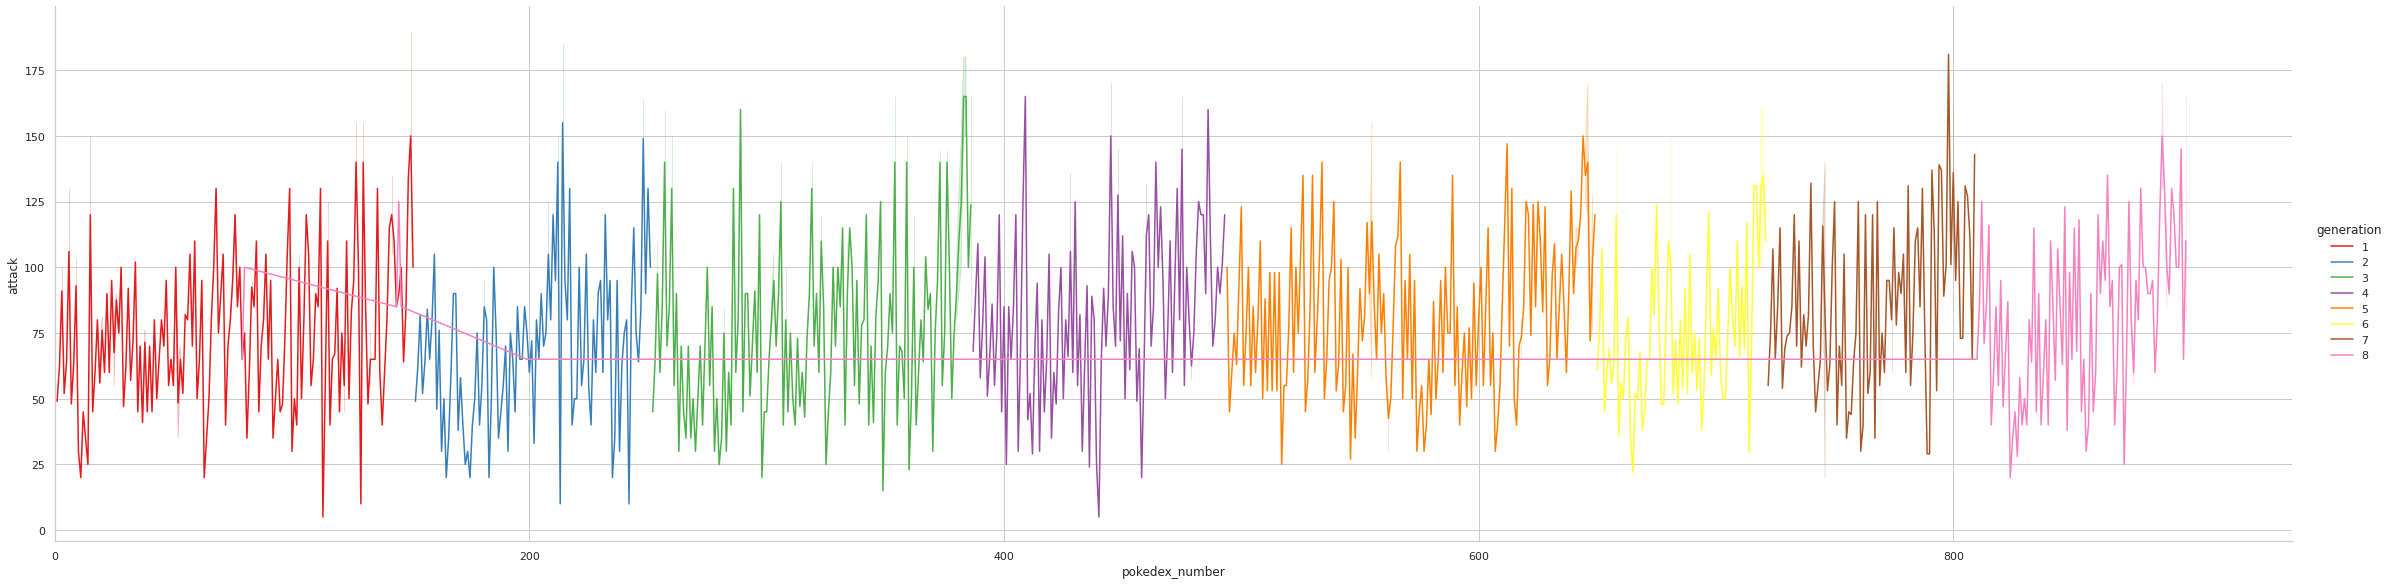

In [28]:
sns.set_style('whitegrid')
g = sns.relplot(x='pokedex_number', y='attack', kind="line", hue = 'generation', palette='Set1', height = 8, aspect = 4, data=pokedex)
g.set(xlim=(0, None))

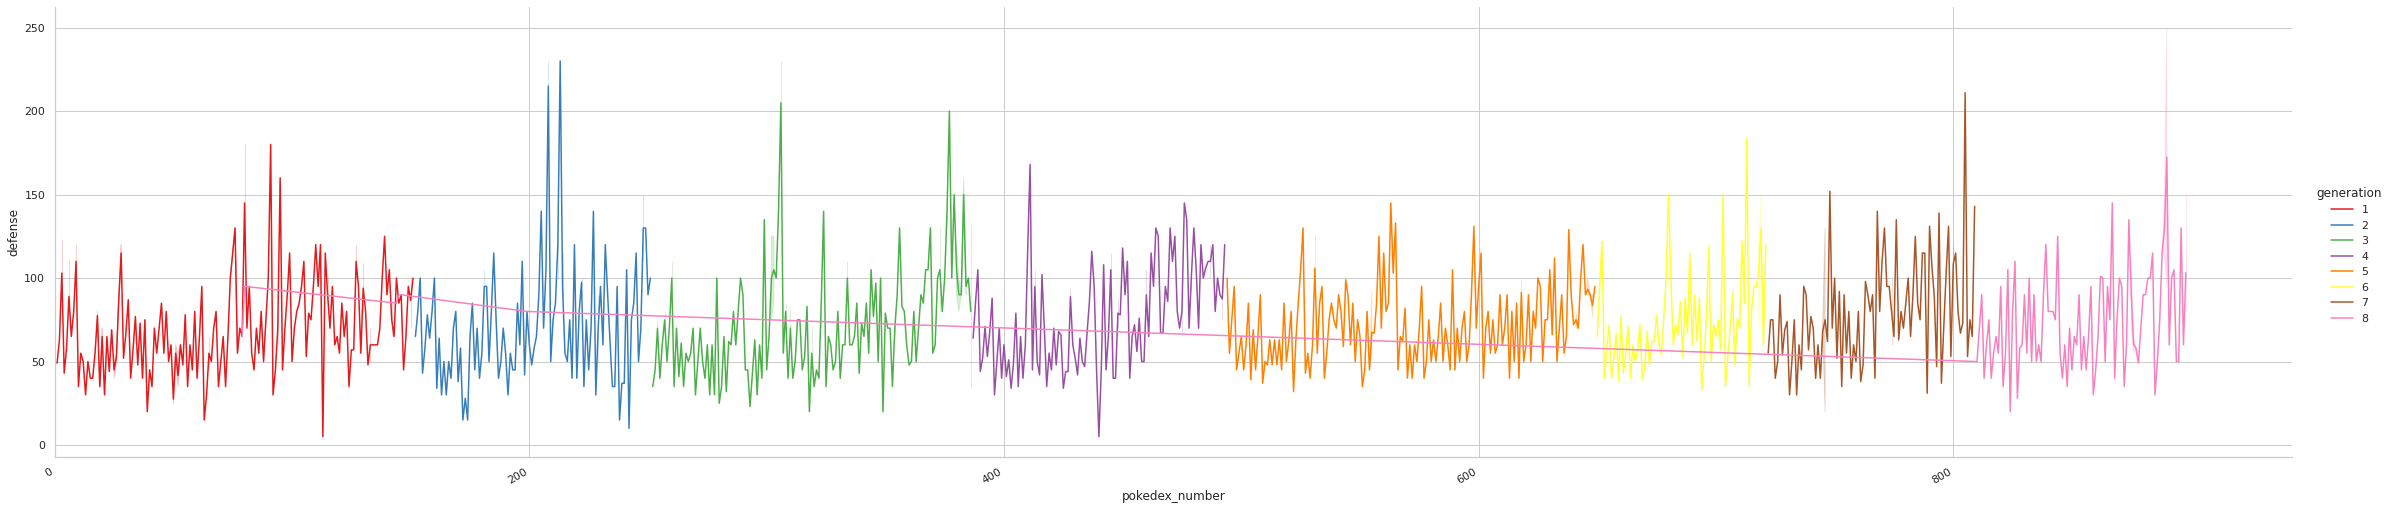

In [29]:
g = sns.relplot(x='pokedex_number', y='defense', kind="line", hue = 'generation', palette='Set1', height = 8, aspect = 4, data=pokedex)
g.set(xlim=(0, None))
g.fig.autofmt_xdate()

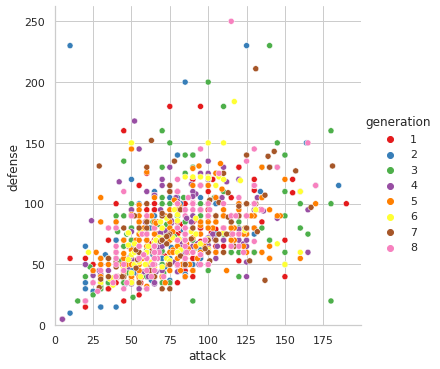

In [30]:
ax = sns.relplot(x='attack', y='defense', hue='generation', legend='full',palette='Set1', data=pokedex)
ax.set(xlim=(0, None), ylim=(0, None))

In [31]:
pokemon_height = pokedex.groupby('name')['height_m'].sum().reset_index().sort_values('height_m',ascending =False)
fig = px.bar(pokemon_height[:50], y='height_m', x='name', color='height_m', height=600)
fig.update_layout(title='Top 50 Pokemon por su altura')
fig.show()

In [32]:
pokemon_weight = pokedex.groupby('name')['weight_kg'].sum().reset_index().sort_values('weight_kg',ascending =False)
fig = px.bar(pokemon_weight[:50], y='weight_kg', x='name', color='weight_kg', height=600)
fig.update_layout(title='Top 50 Pokemon por su peso')
fig.show()

In [33]:
def find_min_and_max(column_name):
    '''
    Get pokemon name according to its max and min attribute: column_name
    column_name: list of str
    '''
    
    # Find max
    max_index = pokedex[column_name].idxmax()
    max_pokemon = pokedex.loc[max_index, 'name']
    
    # Find min
    min_index = pokedex[column_name].idxmin()
    min_pokemon = pokedex.loc[min_index, 'name']
    
    print(f'Pokemon with min {column_name}: {min_pokemon}\nPokemon with max {column_name}: {max_pokemon}\n')
    return max_index, min_index

In [34]:
columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed', 'catch_rate']
min_dict = {}
max_dict = {}
min_pok = {}
max_pok = {}

for colm in columns:
    max_index, min_index = find_min_and_max(colm)
    max_dict[colm] = pokedex.loc[max_index, colm]
    min_dict[colm] = pokedex.loc[min_index, colm]
    max_pok[colm] = pokedex.loc[max_index, 'name']
    min_pok[colm] = pokedex.loc[min_index, 'name']

Pokemon with min attack: Chansey
Pokemon with max attack: Mega Mewtwo X

Pokemon with min defense: Chansey
Pokemon with max defense: Eternatus Eternamax

Pokemon with min sp_attack: Alolan Sandshrew
Pokemon with max sp_attack: Mega Mewtwo Y

Pokemon with min sp_defense: Caterpie
Pokemon with max sp_defense: Eternatus Eternamax

Pokemon with min hp: Shedinja
Pokemon with max hp: Blissey

Pokemon with min speed: Shuckle
Pokemon with max speed: Regieleki

Pokemon with min catch_rate: Articuno
Pokemon with max catch_rate: Caterpie



In [36]:
for colm in ['weight_kg', 'height_m']:
    find_min_and_max(colm)

Pokemon with min weight_kg: Gastly
Pokemon with max weight_kg: Cosmoem

Pokemon with min height_m: Joltik
Pokemon with max height_m: Eternatus Eternamax



In [37]:
graph_1 = pokedex.groupby('type_1').count().sort_values(by = 'name')
index_graph_1 = pokedex.groupby('type_1').count().index

graph_2 = pokedex.groupby('type_2').count().sort_values(by = 'name')
index_graph_2 = pokedex.groupby('type_2').count().index

In [38]:
fig = go.Figure(
    data=[go.Bar(x = index_graph_1, 
                 y=graph_1['name'])],
    layout_title_text="First type distribution",
)

fig.show()

In [39]:
fig = go.Figure(
    data=[go.Bar(x = index_graph_2, 
                 y=graph_2['name'],
                 marker_color = 'mediumpurple')],
    layout_title_text="Second type distribution"
)

fig.show()

# Gráficos de radar

In [40]:
# Select data
columns = ['attack', 'hp', 'defense', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']
df = pokedex[columns].copy()

# Normalize data for better readability
normalized_df=(df-df.min())/(df.max()-df.min())

In [41]:
def radar_chart(pokemon_1_index, pokemon_2_index):
    '''
    Print radarchart of two pokemons
    pokemon_1_index: int, index of pokemon in 'normalized_df'
    pokemon_2_index: int, index of pokemon in 'normalized_df'
    '''
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_1_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokedex.loc[pokemon_1_index,'name']
    ))
    
    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_2_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokedex.loc[pokemon_2_index,'name']
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.update_layout(
        title="Radar Chart: "+pokedex.loc[pokemon_1_index,'name']+" VS "+pokedex.loc[pokemon_2_index,'name'])
    
    fig.show()

In [42]:
radar_chart(pokemon_1_index = 1, pokemon_2_index = 15)

# Armando Nuestro Equipo

In [130]:
norm_pokemon = pokedex[pokedex['status'] == 'Normal']
norm_pokemon

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.50,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,883,Arctovish,Pescryodon,ウオチルドン (Ouchilldon),8,Normal,Fossil Pokémon,2,Water,Ice,2.0,175.0,3,Water Absorb,Ice Body,Slush Rush,505,90,90,100,80,90,55,45.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,35.0,1.0,1.0,0.0,2.0,2.00,0.25,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1024,884,Duraludon,Duraludon,ジュラルドン (Duraludon),8,Normal,Alloy Pokémon,2,Steel,Dragon,1.8,40.0,3,Light Metal,Heavy Metal,Stalwart,535,70,95,115,120,50,85,45.0,NaN,NaN,Medium Fast,2,Dragon,Mineral,50.0,30.0,0.5,1.0,0.5,0.5,0.25,1.00,2.0,0.0,2.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0
1025,885,Dreepy,Grolldra,ドラメシヤ (Dorameshiya),8,Normal,Lingering Pokémon,2,Dragon,Ghost,0.5,2.0,3,Clear Body,Infiltrator,Cursed Body,270,28,60,30,40,30,82,45.0,NaN,NaN,Slow,2,Amorphous,Dragon,50.0,40.0,0.0,0.5,0.5,0.5,0.50,2.00,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0
1026,886,Drakloak,Phandra,ドロンチ (Doronch),8,Normal,Caretaker Pokémon,2,Dragon,Ghost,1.4,11.0,3,Clear Body,Infiltrator,Cursed Body,410,68,80,50,60,50,102,45.0,NaN,NaN,Slow,2,Amorphous,Dragon,50.0,40.0,0.0,0.5,0.5,0.5,0.50,2.00,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0


In [127]:
pokedex.type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [131]:
generacion = randrange(8)
norm_pokemon = norm_pokemon[norm_pokemon['generation'] == generacion]
#norm_pokemon = norm_pokemon[norm_pokemon['type_1']=='Fighting']
norm_pokemon.reset_index(inplace=True, drop=False)

In [132]:
norm_pokemon

,index,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,197,152,Chikorita,Endivie,チコリータ (Chicorita),2,Normal,Leaf Pokémon,1,Grass,NaN,0.9,6.4,2,Overgrow,NaN,Leaf Guard,318,45,49,65,49,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.00,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,198,153,Bayleef,Lorblatt,ベイリーフ (Bayleaf),2,Normal,Leaf Pokémon,1,Grass,NaN,1.2,15.8,2,Overgrow,NaN,Leaf Guard,405,60,62,80,63,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.00,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,199,154,Meganium,Meganie,メガニウム (Meganium),2,Normal,Herb Pokémon,1,Grass,NaN,1.8,100.5,2,Overgrow,NaN,Leaf Guard,525,80,82,100,83,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.00,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,200,155,Cyndaquil,Feurigel,ヒノアラシ (Hinoarashi),2,Normal,Fire Mouse Pokémon,1,Fire,NaN,0.5,7.9,2,Blaze,NaN,Flash Fire,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,1,Field,NaN,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.00,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,201,156,Quilava,Igelavar,マグマラシ (Magmarashi),2,Normal,Volcano Pokémon,1,Fire,NaN,0.9,19.0,2,Blaze,NaN,Flash Fire,405,58,64,58,80,65,80,45.0,70.0,142.0,Medium Slow,1,Field,NaN,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.00,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,294,242,Blissey,Heiteira,ハピナス (Happinas),2,Normal,Happiness Pokémon,1,Normal,NaN,1.5,46.8,3,Natural Cure,Serene Grace,Healer,540,255,10,10,75,135,55,30.0,140.0,608.0,Fast,1,Fairy,NaN,0.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
97,298,246,Larvitar,Larvitar,ヨーギラス (Yogiras),2,Normal,Rock Skin Pokémon,2,Rock,Ground,0.6,72.0,2,Guts,NaN,Sand Veil,300,50,64,50,45,50,41,45.0,35.0,60.0,Slow,1,Monster,NaN,50.0,40.0,0.5,0.5,4.0,0.0,4.0,2.0,2.0,0.25,2.0,0.5,1.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0
98,299,247,Pupitar,Pupitar,サナギラス (Sanagiras),2,Normal,Hard Shell Pokémon,2,Rock,Ground,1.2,152.0,1,Shed Skin,NaN,NaN,410,70,84,70,65,70,51,45.0,35.0,144.0,Slow,1,Monster,NaN,50.0,40.0,0.5,0.5,4.0,0.0,4.0,2.0,2.0,0.25,2.0,0.5,1.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0
99,300,248,Tyranitar,Despotar,バンギラス (Bangiras),2,Normal,Armor Pokémon,2,Rock,Dark,2.0,202.0,2,Sand Stream,NaN,Unnerve,600,100,134,110,95,100,61,45.0,35.0,270.0,Slow,1,Monster,NaN,50.0,40.0,0.5,0.5,2.0,1.0,2.0,1.0,4.0,0.50,2.0,0.5,0.0,2.0,1.0,0.5,1.0,0.5,2.0,2.0


In [133]:
indx_i = norm_pokemon.iloc[0]['index']
indx_f = norm_pokemon.iloc[norm_pokemon.shape[0]-1]['index']
print(indx_i, indx_f)

197 301


In [134]:
norm_pokemon.index = norm_pokemon['index']

In [135]:
def armar_team():
  team = []
  c = 1
  while c <= 6:
    seleccion = randrange(indx_i, indx_f)
    if seleccion not in team:
      team.append(seleccion)
      c+=1
  return team

In [136]:
columns = ['attack', 'hp', 'defense', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']
df = norm_pokemon[columns].copy()

# Normalize data for better readability
normalized_df=(df-df.min())/(df.max()-df.min())

In [137]:
def radar_chart_single(pokemon_1_index):

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_1_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokedex.loc[pokemon_1_index,'name']
    ))
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.update_layout(
        title="Radar Chart: "+pokedex.loc[pokemon_1_index,'name'])
    
    fig.show()

In [ ]:
my_team = armar_team()
for index in my_team:
  radar_chart_single(index)



---



In [ ]:
norm_pokemon = pokedex[pokedex['status'] == 'Normal']

In [169]:
pokedex.type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
type_poke = norm_pokemon[((norm_pokemon['type_1'] == 'Psychic') | (norm_pokemon['type_2'] == 'Psychic')) & (norm_pokemon['generation'] < 4)]
type_poke.head()

In [174]:
index_type =  type_poke.index.to_list()

In [179]:
def random_choise(lsta):
  c = 0
  res = []
  while c < 6:
    ran_num = choice(lsta)
    if ran_num not in res:
      res.append(ran_num)
      c+=1
  return res 

In [180]:
columns = ['attack', 'hp', 'defense', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'speed']
df = type_poke[columns].copy()

# Normalize data for better readability
normalized_df=(df-df.min())/(df.max()-df.min())

In [181]:
def radar_chart_single(pokemon_1_index):

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=normalized_df.loc[pokemon_1_index,:].tolist(),
          theta=columns,
          fill='toself',
          name=pokedex.loc[pokemon_1_index,'name']
    ))
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.update_layout(
        title="Radar Chart: "+pokedex.loc[pokemon_1_index,'name'])
    
    fig.show()

In [182]:
my_team = random_choise(index_type)
for index in my_team:
  radar_chart_single(index)